In [1]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import shutil
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\ARJUN B\AppData\Local\Tesseract-OCR\tesseract.exe'
src = 'C:/Users/ARJUN B/AppData/Local/Tesseract-OCR/tessdata/vie.traineddata'
# dest = '/usr/share/tesseract-ocr/4.00/tessdata/'
# shutil.copy(src, dest)

In [3]:
filenames = os.listdir('C:/Users/ARJUN B/AppData/Local/Tesseract-OCR/tessdata/')
print(filenames)

['configs', 'eng.traineddata', 'eng.user-patterns', 'eng.user-words', 'jaxb-api-2.3.1.jar', 'Malayalam.traineddata', 'osd.traineddata', 'pdf.ttf', 'piccolo2d-core-3.0.1.jar', 'piccolo2d-extras-3.0.1.jar', 'script', 'ScrollView.jar', 'tessconfigs', 'vie.traineddata']


In [4]:
class ImageConstantROI():
    class CCCD(object):
        ROIS = {
            "id": [(456, 308, 403, 53)],
            "name": [
                (325, 393, 771, 64),
            ],
            "birth_date": [(658, 451, 216, 54)],
            "gender": [(538, 495, 95, 44)],
            "address": [(786, 639, 343, 39), (318, 672, 791, 52)],
            "place_birth": [(326, 586, 792, 47)],
            "date_expire": [(155, 653, 152, 31)],
        }

        CHECK_ROI = [(313, 174, 597, 63)]

In [5]:
#Custom function to show open cv image on notebook.
def display_img(cvImg):
    cvImg = cv2.cvtColor(cvImg, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,8))
    plt.imshow(cvImg)
    plt.axis('off')
    plt.show()

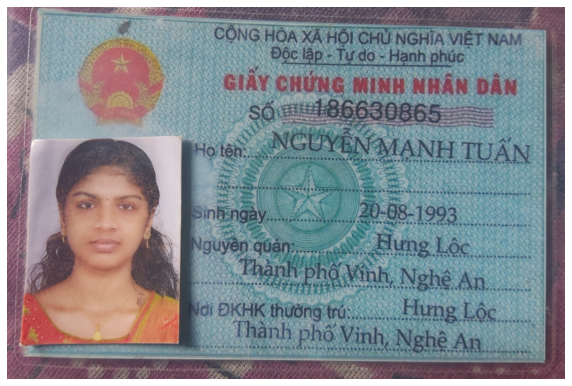

In [6]:
#Loading image using cv2
baseImg = cv2.imread('front.jpeg')

#Declare image size, width height and chanel
baseH, baseW, baseC = baseImg.shape

display_img(baseImg)


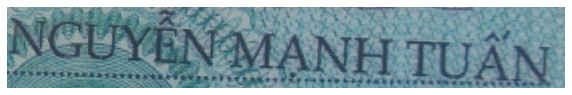

In [7]:
r=cv2.selectROI(baseImg)
#Create a custom function to cropped image base on religion of interest
def cropImageRoi(image, roi):
    roi_cropped = image[
        int(r[1]) : int(r[1] + r[3]), int(r[0]) : int(r[0] + r[2])
    ]
    return roi_cropped

testCrop = cropImageRoi(baseImg, ImageConstantROI.CCCD.ROIS['id'][0])
display_img(testCrop)


In [8]:
pytesseract.image_to_string(testCrop, config='--oem 1 --psm 6')

'NCOVYEN MIANH TUAN\n'

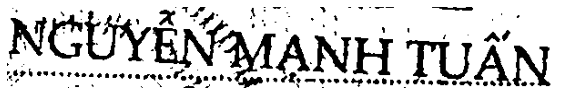

In [9]:
def preprocessing_image(img):
    #Resize image 
    #img = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)

    #convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.multiply(gray, 1.5)
    
    #blur remove noise
    blured1 = cv2.medianBlur(gray,3)
    blured2 = cv2.medianBlur(gray,51)
    divided = np.ma.divide(blured1, blured2).data
    normed = np.uint8(255*divided/divided.max())
    
    
    #Threshold image
    th, threshed = cv2.threshold(normed, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)
    
    
    return threshed

testPreprocess = preprocessing_image(testCrop)
display_img(testPreprocess)

In [10]:
# #Extract all interest data from image
# MODEL_CONFIG = '-l vie --oem 1 --psm 6'
# for key, roi in ImageConstantROI.CCCD.ROIS.items():
#     data = ''
#     for r in roi:
#         crop_img = cropImageRoi(baseImg, r)
        
#         #For a small pxi image only has number, do not preprocessing it is better
#         if key != 'date_expire':
#             crop_img = preprocessing_image(crop_img)
        
#         display_img(crop_img)

        
#         data += pytesseract.image_to_string(crop_img, config = MODEL_CONFIG) + ' '
# print(f"{key} : {data.strip()}")